In [164]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms

In [165]:
class Model(nn.Module):

    def __init__(self, ip_size, hidden_size, op_size):
        super(Model, self).__init__()
        self.fc1 = nn.Linear(ip_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, op_size)

    def forward(self, x):
        x = self.fc1(x)
        x = F.relu(x)
        x = self.fc2(x)
        return x

In [166]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

In [167]:
input_size = 784
output_size = 10
hidden_size = 200
learning_rate = 0.001
batch_size = 64
epochs = 10
tr_ds = 'Training Dataset'
te_ds = 'Test Dataset'

In [168]:
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=transforms.ToTensor(), download=True)
train_loader = DataLoader(dataset=train_dataset, batch_size=batch_size, shuffle=True)

In [169]:
test_dataset = datasets.MNIST(root='dataset/', train=False, transform=transforms.ToTensor(), download=True)
test_loader = DataLoader(dataset=test_dataset, batch_size=batch_size, shuffle=True)

In [170]:
model = Model(input_size, hidden_size, output_size).to(device=device)

In [171]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

In [172]:
def check_accuracy(loader, model):
    correct = 0
    samples = 0
    model.eval()
    with torch.no_grad():
        for x, y in loader:
            x = x.to(device=device)
            y = y.to(device=device)
            x = x.reshape(x.shape[0],-1)

            y_pred = model(x)
            _, y_pred = y_pred.max(1)
            correct += (y_pred == y).sum()
            samples += y_pred.size(0)


        print(f'Accuracy on {tr_ds if loader.dataset.train else te_ds} is {correct} / {samples} = {(correct/samples) * 100:.2f}')
    model.train()

Accuracy on Test Dataset is 829 / 10000 = 8.29
Epoch: 0 and Loss: 0.308901
Accuracy on Test Dataset is 9507 / 10000 = 95.07
Epoch: 1 and Loss: 0.132879
Accuracy on Test Dataset is 9665 / 10000 = 96.65
Epoch: 2 and Loss: 0.090386
Accuracy on Test Dataset is 9714 / 10000 = 97.14
Epoch: 3 and Loss: 0.065931
Accuracy on Test Dataset is 9749 / 10000 = 97.49
Epoch: 4 and Loss: 0.051252
Accuracy on Test Dataset is 9751 / 10000 = 97.51
Epoch: 5 and Loss: 0.039730
Accuracy on Test Dataset is 9772 / 10000 = 97.72
Epoch: 6 and Loss: 0.030718
Accuracy on Test Dataset is 9787 / 10000 = 97.87
Epoch: 7 and Loss: 0.024427
Accuracy on Test Dataset is 9778 / 10000 = 97.78
Epoch: 8 and Loss: 0.019516
Accuracy on Test Dataset is 9787 / 10000 = 97.87
Epoch: 9 and Loss: 0.014765


Text(0.5, 0, 'epoch')

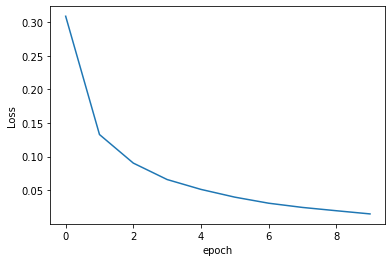

In [173]:
losses = []

for epoch in range(epochs):
    batch_count = 0
    total_loss = 0
    check_accuracy(test_loader, model)
    for batch_index, (data,targets) in enumerate(train_loader):
        data = data.to(device=device)
        targets = targets.to(device=device)
        data = data.reshape(data.shape[0],-1)

        y_pred = model(data)
        loss = criterion(y_pred, targets)

        total_loss += loss.item()
        batch_count += 1

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    avg_loss = total_loss/batch_count
    print(f'Epoch: {epoch} and Loss: {avg_loss:.6f}')


    losses.append(round(avg_loss,6))

plt.plot(range(epochs), losses)
plt.ylabel('Loss')
plt.xlabel('epoch')

In [174]:
check_accuracy(train_loader, model)
check_accuracy(test_loader, model)

Accuracy on Training Dataset is 59828 / 60000 = 99.71
Accuracy on Test Dataset is 9795 / 10000 = 97.95
